<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/ecc_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# y^2 = x^3 + 7 mod 17
def curve_equation(x, a=0, b=7, p=17):
    """Elliptic curve equation y^2 = x^3 + ax + b mod p."""
    return (x**3 + a*x + b) % p

def is_curve_point(x, y, a=0, b=7, p=17):
    """Check if the point (x, y) satisfies the elliptic curve equation mod p."""
    return curve_equation(x, a, b, p) == (y**2) % p

In [ ]:
def mod_inverse(a, p):
    """Returns the modular inverse of a under modulo p using Fermat's Little Theorem."""
    return pow(a, p - 2, p)

def calculate_slope_mod(P, Q, p, a):
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 == y2:
        # Use the formula for point doubling when P == Q
        numerator = (3 * x1**2 + a) % p
        denominator = (2 * y1) % p
    else:
        # Use the formula for regular slope when P != Q
        numerator = (y2 - y1) % p
        denominator = (x2 - x1) % p

    if denominator == 0:
        raise ValueError("Slope is undefined (denominator is zero).")

    # Compute the slope as (numerator / denominator) % p, which is
    # numerator * mod_inverse(denominator, p) % p
    slope = (numerator * mod_inverse(denominator, p)) % p
    return slope

# Point Addition

In [ ]:
def calculate_add_xr_mod(P, Q, m, p):
    x1, y1 = P
    x2, y2 = Q
    xr = (m**2 - x1 - x2) % p
    return xr

In [ ]:
def calculate_add_yr_mod(P, Q, m, xr, p):
    x1, y1 = P
    x2, y2 = Q
    yr = (m * (x1 - xr) - y1) % p
    return yr

In [ ]:
def calculate_point_add(P, Q, p, a):
  print(f'P: {P}')
  print(f'Q: {Q}')
  print(f'p: {p}')

  m = calculate_slope_mod(P, Q, p, a)
  print(f'slope: {m}')

  xr = calculate_add_xr_mod(P, Q, m, p)
  print(f'xr: {xr}')

  yr = calculate_add_yr_mod(P, Q, m, xr, p)
  print(f'yr: {yr}')

  R = (xr, yr)
  print(f'R: {R}')

  print(f'is R on curve: {is_curve_point(R[0], R[1], p)}')

  return R

# Point Multiplication

In [ ]:
def calculate_mul_xr_mod(P, Q, slope, p):
    x1, y1 = P
    x2, y2 = Q
    xr = (slope**2 - (2 * x1)) % p
    return xr

In [ ]:
def calculate_mul_yr_mod(P, Q, slope, xr, p):
    x1, y1 = P
    yr = (slope * (x1 - xr) - y1) % p
    return yr

In [ ]:
def calculate_point_mul(P, p, a):
  print(f'P: {P}')
  print(f'p: {p}')

  m = calculate_slope_mod(P, P, p, a)
  print(f'slope: {m}')

  xr = calculate_mul_xr_mod(P, P, m, p)
  print(f'xr: {xr}')

  yr = calculate_mul_yr_mod(P, P, m, xr, p)
  print(f'yr: {yr}')

  R = (xr, yr)
  print(f'R: {R}')

  print(f'is R on curve: {is_curve_point(R[0], R[1], p)}')

  return R

# Test

In [ ]:
# y^2 = x^3 + x + 6
def curve_equation(x, p, a=1, b=6):
    """Elliptic curve equation y^2 = x^3 + ax + b mod p."""
    return (x**3 + a*x + b) % p

def is_curve_point(x, y, p=11):
    """Check if the point (x, y) satisfies the elliptic curve equation mod p."""
    return curve_equation(x, p=p) == (y**2) % p

In [ ]:
P = (2, 4)
Q = (5, 9)

R = calculate_point_add(P, Q, 11, 1)

P: (2, 4)
Q: (5, 9)
p: 11
slope: 9
xr: 8
yr: 8
R: (8, 8)
is R on curve: True


In [ ]:
_R = calculate_point_mul(P, 11, 1)

P: (2, 4)
p: 11
slope: 3
xr: 5
yr: 9
R: (5, 9)
is R on curve: True


# Elliptic Curve Diffie Hellman

In [ ]:
def curve_equation(x, p, a=2, b=1):
    """Elliptic curve equation y^2 = x^3 + ax + b mod p."""
    return (x**3 + a*x + b) % p

def is_curve_point(x, y, p=5):
    """Check if the point (x, y) satisfies the elliptic curve equation mod p."""
    return curve_equation(x, p=p) == (y**2) % p

In [ ]:
# y^2 = x^3 + 2x + 1
a = 2
# b = 1

p = 5
P1 = (0, 1)

PA = calculate_point_mul(P, p, a)

P: (0, 1)
p: 5
slope: 1
xr: 1
yr: 3
R: (1, 3)
is R on curve: True


In [ ]:
PB = calculate_point_add(P1, P2, p, a)

P: (0, 1)
Q: (1, 3)
p: 5
slope: 2
xr: 3
yr: 3
R: (3, 3)
is R on curve: True


In [ ]:
KA = calculate_point_mul(PB, p, a)

P: (3, 3)
p: 5
slope: 4
xr: 0
yr: 4
R: (0, 4)
is R on curve: True


In [ ]:
KB_1 = calculate_point_mul(PA, p, a)

P: (1, 3)
p: 5
slope: 0
xr: 3
yr: 2
R: (3, 2)
is R on curve: True


In [ ]:
KB_2 = calculate_point_add(P ,KB_1, p, a)

P: (0, 1)
Q: (3, 2)
p: 5
slope: 2
xr: 1
yr: 2
R: (1, 2)
is R on curve: True


In [ ]:
KB_3 = calculate_point_add(P, KB_2, p, a)

P: (0, 1)
Q: (1, 2)
p: 5
slope: 1
xr: 0
yr: 4
R: (0, 4)
is R on curve: True


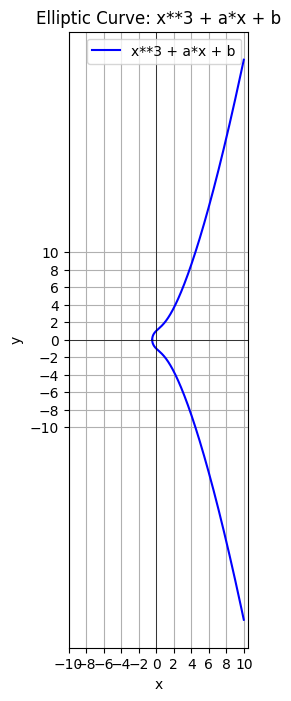

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a generalized elliptic curve with a callback equation
def plot_elliptic_curve(a, b, equation_callback, x_range=(-10, 10), num_points=100000, curve_label=None):
    """
    Plot an elliptic curve given an equation as a callback.

    Parameters:
    a (float): The 'a' coefficient to pass into the elliptic curve equation.
    b (float): The 'b' coefficient to pass into the elliptic curve equation.
    equation_callback (function): A callback function defining the elliptic curve equation.
    x_range (tuple): The range of x values for plotting (default is from -10 to 10).
    num_points (int): The number of points to plot (default is 100000).
    curve_label (str): A custom label for the curve plot (default uses the equation).
    """
    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(x_range[0], x_range[1], num_points)

    # Calculate the corresponding y^2 values using the provided callback function
    y_squared = equation_callback(x, a, b)

    # Mask values where y^2 is negative (because sqrt can't be applied to negative numbers)
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # If no label is provided, use the default equation format in the label
    if curve_label is None:
        curve_label = rf'$y = \sqrt{{x^3 + {a}x + {b}}}$'

    # Plot the elliptic curve
    plt.figure(figsize=(8, 8))
    plt.plot(x_valid, y_positive, label=curve_label, color='blue')  # Upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # Lower half of the curve

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title(f"Elliptic Curve: {curve_label}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

# Example callback function for the elliptic curve equation y^2 = x^3 + ax + b
def equation_elliptic_example(x, a, b):
    return x**3 + a*x + b

# Example usage with parameters a = 3, b = 5, and the equation callback
plot_elliptic_curve(a=2, b=1, equation_callback=equation_elliptic_example, curve_label='x**3 + a*x + b')

In [ ]:
!git clone https://github.com/RobinDavid/LSB-Steganography && cd LSB-Steganography && ls && pip install -r requirements.txt

Cloning into 'LSB-Steganography'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 75 (delta 1), reused 2 (delta 0), pack-reused 68 (from 1)
Receiving objects: 100% (75/75), 19.72 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (26/26), done.
LICENCE  LSBSteg.py  README.md	requirements.txt
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=19f5aa7b3f0b4c4b2800a33ff332960492ef2569f6362210385bb27c1c33f604
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
#!/usr/bin/env python
# coding:UTF-8
"""LSBSteg.py

Usage:
  LSBSteg.py encode -i <input> -o <output> -f <file>
  LSBSteg.py decode -i <input> -o <output>

Options:
  -h, --help                Show this help
  --version                 Show the version
  -f,--file=<file>          File to hide
  -i,--in=<input>           Input image (carrier)
  -o,--out=<output>         Output image (or extracted file)
"""

import cv2
import docopt
import numpy as np


class SteganographyException(Exception):
    pass


class LSBSteg():
    def __init__(self, im):
        self.image = im
        self.height, self.width, self.nbchannels = im.shape
        self.size = self.width * self.height

        self.maskONEValues = [1,2,4,8,16,32,64,128]
        #Mask used to put one ex:1->00000001, 2->00000010 .. associated with OR bitwise
        self.maskONE = self.maskONEValues.pop(0) #Will be used to do bitwise operations

        self.maskZEROValues = [254,253,251,247,239,223,191,127]
        #Mak used to put zero ex:254->11111110, 253->11111101 .. associated with AND bitwise
        self.maskZERO = self.maskZEROValues.pop(0)

        self.curwidth = 0  # Current width position
        self.curheight = 0 # Current height position
        self.curchan = 0   # Current channel position

    def put_binary_value(self, bits): #Put the bits in the image
        for c in bits:
            val = list(self.image[self.curheight,self.curwidth]) #Get the pixel value as a list
            if int(c) == 1:
                val[self.curchan] = int(val[self.curchan]) | self.maskONE #OR with maskONE
            else:
                val[self.curchan] = int(val[self.curchan]) & self.maskZERO #AND with maskZERO

            self.image[self.curheight,self.curwidth] = tuple(val)
            self.next_slot() #Move "cursor" to the next space

    def next_slot(self):#Move to the next slot were information can be taken or put
        if self.curchan == self.nbchannels-1: #Next Space is the following channel
            self.curchan = 0
            if self.curwidth == self.width-1: #Or the first channel of the next pixel of the same line
                self.curwidth = 0
                if self.curheight == self.height-1:#Or the first channel of the first pixel of the next line
                    self.curheight = 0
                    if self.maskONE == 128: #Mask 1000000, so the last mask
                        raise SteganographyException("No available slot remaining (image filled)")
                    else: #Or instead of using the first bit start using the second and so on..
                        self.maskONE = self.maskONEValues.pop(0)
                        self.maskZERO = self.maskZEROValues.pop(0)
                else:
                    self.curheight +=1
            else:
                self.curwidth +=1
        else:
            self.curchan +=1

    def read_bit(self): #Read a single bit int the image
        val = self.image[self.curheight,self.curwidth][self.curchan]
        val = int(val) & self.maskONE
        self.next_slot()
        if val > 0:
            return "1"
        else:
            return "0"

    def read_byte(self):
        return self.read_bits(8)

    def read_bits(self, nb): #Read the given number of bits
        bits = ""
        for i in range(nb):
            bits += self.read_bit()
        return bits

    def byteValue(self, val):
        return self.binary_value(val, 8)

    def binary_value(self, val, bitsize): #Return the binary value of an int as a byte
        binval = bin(val)[2:]
        if len(binval) > bitsize:
            raise SteganographyException("binary value larger than the expected size")
        while len(binval) < bitsize:
            binval = "0"+binval
        return binval

    def encode_text(self, txt):
        l = len(txt)
        binl = self.binary_value(l, 16) #Length coded on 2 bytes so the text size can be up to 65536 bytes long
        self.put_binary_value(binl) #Put text length coded on 4 bytes
        for char in txt: #And put all the chars
            c = ord(char)
            self.put_binary_value(self.byteValue(c))
        return self.image

    def decode_text(self):
        ls = self.read_bits(16) #Read the text size in bytes
        l = int(ls,2)
        i = 0
        unhideTxt = ""
        while i < l: #Read all bytes of the text
            tmp = self.read_byte() #So one byte
            i += 1
            unhideTxt += chr(int(tmp,2)) #Every chars concatenated to str
        return unhideTxt

    def encode_image(self, imtohide):
        w = imtohide.width
        h = imtohide.height
        if self.width*self.height*self.nbchannels < w*h*imtohide.channels:
            raise SteganographyException("Carrier image not big enough to hold all the datas to steganography")
        binw = self.binary_value(w, 16) #Width coded on to byte so width up to 65536
        binh = self.binary_value(h, 16)
        self.put_binary_value(binw) #Put width
        self.put_binary_value(binh) #Put height
        for h in range(imtohide.height): #Iterate the hole image to put every pixel values
            for w in range(imtohide.width):
                for chan in range(imtohide.channels):
                    val = imtohide[h,w][chan]
                    self.put_binary_value(self.byteValue(int(val)))
        return self.image


    def decode_image(self):
        width = int(self.read_bits(16),2) #Read 16bits and convert it in int
        height = int(self.read_bits(16),2)
        unhideimg = np.zeros((width,height, 3), np.uint8) #Create an image in which we will put all the pixels read
        for h in range(height):
            for w in range(width):
                for chan in range(unhideimg.channels):
                    val = list(unhideimg[h,w])
                    val[chan] = int(self.read_byte(),2) #Read the value
                    unhideimg[h,w] = tuple(val)
        return unhideimg

    def encode_binary(self, data):
        l = len(data)
        if self.width*self.height*self.nbchannels < l+64:
            raise SteganographyException("Carrier image not big enough to hold all the datas to steganography")
        self.put_binary_value(self.binary_value(l, 64))
        for byte in data:
            byte = byte if isinstance(byte, int) else ord(byte) # Compat py2/py3
            self.put_binary_value(self.byteValue(byte))
        return self.image

    def decode_binary(self):
        l = int(self.read_bits(64), 2)
        output = b""
        for i in range(l):
            output += bytearray([int(self.read_byte(),2)])
        return output


def main():
    args = docopt.docopt(__doc__, version="0.2")
    in_f = args["--in"]
    out_f = args["--out"]
    in_img = cv2.imread(in_f)
    steg = LSBSteg(in_img)
    lossy_formats = ["jpeg", "jpg"]

    if args['encode']:
        #Handling lossy format
        out_f, out_ext = out_f.split(".")
        if out_ext in lossy_formats:
            out_f = out_f + ".png"
            print("Output file changed to ", out_f)

        data = open(args["--file"], "rb").read()
        res = steg.encode_binary(data)
        cv2.imwrite(out_f, res)

    elif args["decode"]:
        raw = steg.decode_binary()
        with open(out_f, "wb") as f:
            f.write(raw)

# if __name__=="__main__":
#     main()

In [ ]:
im = cv2.imread("/content/lsb_w_ECC_LZW_package.png")
steg = LSBSteg(im)
bytess = steg.decode_text()
print(bytess.encode())

b'\x18\r\x06\xc2\x83a\xc2\xb9\xc2\x84lc\x19\xc2\x8cL#\x18)\xc2\x88l5\x18\xc3\x80\xc2\xa1\xc2\xa6\x11\xc2\xa9\xc2\x88\xc3\x8a82\xc2\x99\xc2\x8c\xc3\x83A\xc2\x89\xc2\x98f41\x0c\xc2\x8c#\xc2\x83\x08\xc3\x9c\xc3\x84f\x1c\r\xc2\x87\x03\xc2\x81\xc3\x88\xc3\x8c\xc3\x8cd\xc2\x98\x0c\xc3\x86\x06!\xc3\x80\xc3\x8c\xc3\x841\x18\xc2\x8eF\xc2\x86a\xc2\x88\xc3\x88\xc3\x867\x18\xc2\x98\xc2\x86qa\xc3\x88\xc3\xa4nc3N\xc3\xa7\xc3\x831\xc3\x8d\x00\xc3\x8b1\x1c\xc2\x8c\xc2\x8c\xc2\xb2\xc2\xb1\xc2\xb0\xc3\x84jd\xc2\xa7\xc2\x98L#\xc2\x98Y\xc2\x94h7\xc2\xa3\r\xc2\xa2\x161\xc2\xa1\xc2\x8e\\0\x1cJFs\x11\xc2\x99\xc2\x8cqC\xc2\xacN\x0c\xc2\x92\xc2\x89\xc3\x90\xc3\x88d9\x1b\x0c\xc3\xa8\xc2\x86\x11\xc2\x90\xc3\x98\xc3\x8dH3\x19Lc\x01\xc2\x91\xc2\x88\xc3\x885\xc2\x99\xc2\x8dF\xc3\x90<\x10\xc3\x8cn0\x18V\xc3\xae\x06a\xc2\xadl`5\x1c\xc2\x99+\xc2\xb1\xc2\x8b\xc3\x94n\xc2\xa1w\x1a\xc3\x8f\xc3\x8cw\xc2\x88\xc3\xb0\xc3\x82\x0cc2\xc3\x80\xc2\xa1Fc\x158p2\x1a\xc3\x8b/\xc3\x95}P\xc3\xa6\xc3\x93\xc2\xa9\x18\xc3\xa2\x0c\xc3\x8